In [ ]:
!pip install xlrd==2.0.1

import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GSAF5.xls to GSAF5.xls


In [174]:
shark_df = pd.read_excel('GSAF5.xls')
#to use collab files, we have used a Relative Path (just the name of the file, not the whole path)

In [175]:
shark_df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [177]:
shark_df.duplicated().sum()

24

In [178]:
shark_df.isna().sum()

Date                25
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

In [179]:
shark_df.duplicated(subset=['Date',"Year","Type","Country",	"State","Location",	"Activity",	"Name",	"Sex","Age"]).sum()

32

In [180]:
#Standardize Column Names:
shark_df.columns = shark_df.columns.str.lower().str.replace(' ', '_')
shark_df.columns = shark_df.columns.str.lower().str.replace('.', '_')

shark_df.columns

# Ensure 'age' column is numeric
shark_df['age'] = pd.to_numeric(shark_df['age'], errors='coerce')

# Clean the data: Remove leading/trailing whitespace
shark_df = shark_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Normalize text: Convert all text to lowercase
shark_df = shark_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# Add a name for the "fatal = y/n"
shark_df.rename(columns= {'unnamed:_11': 'fatal'}, inplace=True)

In [181]:
shark_df.head()

,date,year,type,country,state,location,activity,name,sex,age,...,species_,source,pdf,href_formula,href,case_number,case_number_1,original_order,unnamed:_21,unnamed:_22
0,15 mar 2024,2024.0,unprovoked,australia,queensland,bargara beach,swimming,brooklyn sauer,f,13.0,...,tiger shark,"yahoo news, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 mar 2024,2024.0,unprovoked,usa,hawaii,"old man's, waikiki",surfing,matthew white,m,NaN,...,tiger shark 8',"surfer, 3/6/2024f",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 mar-2024,2024.0,unprovoked,usa,hawaii,"rainbows, oahu",swimming,NaN,f,11.0,...,3' to 4' shark,"hawaii news now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 feb-2024,2024.0,unprovoked,australia,western australia,"sandlnd island, jurian bay",NaN,female,f,46.0,...,tiger shark,"wa today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 feb-2024,2024.0,unprovoked,india,maharashtra,"vaitarna river, palghar district",fishing,vicky suresh govari,m,32.0,...,"bull shark, 7'","times of india, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# Drop the columns
columns_to_drop = ['unnamed:_22', 'unnamed:_21', 'original_order', 'href', 'href_formula', 'pdf']
shark_df = shark_df.drop(columns=columns_to_drop)

# Display the first few rows to verify
shark_df.head()

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal,time,species_,source,case_number,case_number_1
0,15 mar 2024,2024.0,unprovoked,australia,queensland,bargara beach,swimming,brooklyn sauer,f,13.0,"minor injuries to back, abdomen and legs",NaN,16h00,tiger shark,"yahoo news, 3/15/2024",NaN,NaN
1,04 mar 2024,2024.0,unprovoked,usa,hawaii,"old man's, waikiki",surfing,matthew white,m,NaN,"no injury, shark bit surfboard",n,NaN,tiger shark 8',"surfer, 3/6/2024f",NaN,NaN
2,02 mar-2024,2024.0,unprovoked,usa,hawaii,"rainbows, oahu",swimming,NaN,f,11.0,lacerations to left foot,n,13h30,3' to 4' shark,"hawaii news now, 3/4/2024",NaN,NaN
3,25 feb-2024,2024.0,unprovoked,australia,western australia,"sandlnd island, jurian bay",NaN,female,f,46.0,leg bitten,n,11h30,tiger shark,"wa today, 2/26/2024",NaN,NaN
4,14 feb-2024,2024.0,unprovoked,india,maharashtra,"vaitarna river, palghar district",fishing,vicky suresh govari,m,32.0,calf of lower left leg injured,n,NaN,"bull shark, 7'","times of india, 2/14/2024",NaN,NaN


In [183]:
#drops any row that has less than 3 valid values
shark_df.dropna(thresh=3, inplace=True)

In [184]:
shark_df = shark_df.drop_duplicates()
shark_df

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal,time,species_,source,case_number,case_number_1
0,15 mar 2024,2024.0,unprovoked,australia,queensland,bargara beach,swimming,brooklyn sauer,f,13.0,"minor injuries to back, abdomen and legs",NaN,16h00,tiger shark,"yahoo news, 3/15/2024",NaN,NaN
1,04 mar 2024,2024.0,unprovoked,usa,hawaii,"old man's, waikiki",surfing,matthew white,m,NaN,"no injury, shark bit surfboard",n,NaN,tiger shark 8',"surfer, 3/6/2024f",NaN,NaN
2,02 mar-2024,2024.0,unprovoked,usa,hawaii,"rainbows, oahu",swimming,NaN,f,11.0,lacerations to left foot,n,13h30,3' to 4' shark,"hawaii news now, 3/4/2024",NaN,NaN
3,25 feb-2024,2024.0,unprovoked,australia,western australia,"sandlnd island, jurian bay",NaN,female,f,46.0,leg bitten,n,11h30,tiger shark,"wa today, 2/26/2024",NaN,NaN
4,14 feb-2024,2024.0,unprovoked,india,maharashtra,"vaitarna river, palghar district",fishing,vicky suresh govari,m,32.0,calf of lower left leg injured,n,NaN,"bull shark, 7'","times of india, 2/14/2024",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,before 1903,0.0,unprovoked,australia,western australia,roebuck bay,diving,male,m,NaN,fatal,y,NaN,NaN,"h. taunton; n. bartlett, p. 234",nd.0005,nd.0005
6940,before 1903,0.0,unprovoked,australia,western australia,NaN,pearl diving,ahmun,m,NaN,fatal,y,NaN,NaN,"h. taunton; n. bartlett, pp. 233-234",nd.0004,nd.0004
6941,1900-1905,0.0,unprovoked,usa,north carolina,ocracoke inlet,swimming,coast guard personnel,m,NaN,fatal,y,NaN,NaN,"f. schwartz, p.23; c. creswell, gsaf",nd.0003,nd.0003
6942,1883-1889,0.0,unprovoked,panama,NaN,"panama bay 8ºn, 79ºw",NaN,jules patterson,m,NaN,fatal,y,NaN,NaN,"the sun, 10/20/1938",nd.0002,nd.0002


In [185]:
shark_df.reset_index(drop=True, inplace=True)

In [186]:
# Convert 'date' column to datetime, errors='coerce' will handle invalid parsing by setting NaT
shark_df['date'] = pd.to_datetime(shark_df['date'], errors='coerce')

# Convert 'year' column to datetime format (assuming 'year' is full year)
shark_df['year'] = pd.to_datetime(shark_df['year'], format='%Y', errors='coerce')

# Convert 'time' column to datetime format (extracting hour and minute)
# Assuming 'time' column format is like '16h00'
shark_df['time'] = pd.to_datetime(shark_df['time'], format='%Hh%M', errors='coerce').dt.time

shark_df

#night_attacks = shark_df[((shark_df['time'].dt.hour >= 20) & (shark_df['time'].dt.hour < 4))]

<ipython-input-186-b5fcd24f8c0c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shark_df['date'] = pd.to_datetime(shark_df['date'], errors='coerce')


,date,year,type,country,state,location,activity,name,sex,age,injury,fatal,time,species_,source,case_number,case_number_1
0,2024-03-15,2024-01-01,unprovoked,australia,queensland,bargara beach,swimming,brooklyn sauer,f,13.0,"minor injuries to back, abdomen and legs",NaN,16:00:00,tiger shark,"yahoo news, 3/15/2024",NaN,NaN
1,2024-03-04,2024-01-01,unprovoked,usa,hawaii,"old man's, waikiki",surfing,matthew white,m,NaN,"no injury, shark bit surfboard",n,NaT,tiger shark 8',"surfer, 3/6/2024f",NaN,NaN
2,2024-03-02,2024-01-01,unprovoked,usa,hawaii,"rainbows, oahu",swimming,NaN,f,11.0,lacerations to left foot,n,13:30:00,3' to 4' shark,"hawaii news now, 3/4/2024",NaN,NaN
3,2024-02-25,2024-01-01,unprovoked,australia,western australia,"sandlnd island, jurian bay",NaN,female,f,46.0,leg bitten,n,11:30:00,tiger shark,"wa today, 2/26/2024",NaN,NaN
4,2024-02-14,2024-01-01,unprovoked,india,maharashtra,"vaitarna river, palghar district",fishing,vicky suresh govari,m,32.0,calf of lower left leg injured,n,NaT,"bull shark, 7'","times of india, 2/14/2024",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,NaT,NaT,unprovoked,australia,western australia,roebuck bay,diving,male,m,NaN,fatal,y,NaN,NaN,"h. taunton; n. bartlett, p. 234",nd.0005,nd.0005
6940,NaT,NaT,unprovoked,australia,western australia,NaN,pearl diving,ahmun,m,NaN,fatal,y,NaN,NaN,"h. taunton; n. bartlett, pp. 233-234",nd.0004,nd.0004
6941,NaT,NaT,unprovoked,usa,north carolina,ocracoke inlet,swimming,coast guard personnel,m,NaN,fatal,y,NaN,NaN,"f. schwartz, p.23; c. creswell, gsaf",nd.0003,nd.0003
6942,NaT,NaT,unprovoked,panama,NaN,"panama bay 8ºn, 79ºw",NaN,jules patterson,m,NaN,fatal,y,NaN,NaN,"the sun, 10/20/1938",nd.0002,nd.0002


In [187]:
shark_df.shape

(6944, 17)

In [188]:
shark_df.reset_index(drop=True, inplace=True)

In [189]:
shark_df['species_'].unique()


array(['tiger shark', "tiger shark 8'", "3' to 4' shark", ...,
       "12' tiger shark", 'blue pointers',
       'said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [190]:
shark_df['species_'].nunique()

1563

In [191]:
import re

# List of shark species (created by AI given shark_df['species_'].unique())
shark_species = [
    "tiger shark", "bull shark", "blacktip reef shark", "white shark", "raggedtooth shark",
    "bronze whaler", "sevengill shark", "lemon shark", "oceanic whitetip shark", "nurse shark",
    "galapagos shark", "cookiecutter shark", "blue shark", "wobbegong shark", "caribbean reef shark",
    "grey reef shark", "mako shark", "blacktip shark", "porbeagle", "broadnose sevengill shark",
    "dogfish", "spinner shark", "sandtiger shark", "tope shark", "angel shark", "sicklefin lemon shark",
    "tawny nurse shark", "silky shark", "salmon shark"
]

# Non-shark terms and other specific replacements (created by AI given shark_df['species_'].unique())
non_shark_terms = [
    r"authorities report injury caused by a barracuda", r"injuries not caused by a shark",
    r"injury believed caused by an eel, not a shark", r"no shark involvement",
    r"shovelnose 'shark' which is a ray, not a shark", r"reported as shark bite but injury caused by stingray",
    r"reported as shark attacks but injuries caused by toadfish", r"invalid incident",
    r"some drowned but others may have been killed by blue sharks", r"questionable",
    r"shark involvement prior to death not confirmed", r"shark involvement unconfirmed but considered probable",
    r"thought to involve a 3' to 4' shark, but shark involvement not confirmed",
    r"\?"
]

# Create the mapping dictionary
mapping_dict = {re.escape(term): 'not a shark' for term in non_shark_terms}
mapping_dict.update({
    re.escape(term): term for term in shark_species
})
mapping_dict.update({
    r'\bshark involvement prior to death not confirmed\b': 'not confirmed',
    r'\bshark involvement unconfirmed but considered probable\b': 'not confirmed',
    r'\bthought to involve a 3\' to 4\' shark, but shark involvement not confirmed\b': 'not confirmed',
    r'\?': 'unknown',
    r'\b(\d+\'? )?shark\b': 'shark'
})

# Function to apply mapping dictionary using regex
def apply_mapping(s):
    if isinstance(s, str):
        for pattern, replacement in mapping_dict.items():
            if re.search(pattern, s, flags=re.IGNORECASE):
                return replacement
    return 'unknown'  # Handle non-string values

# Ensure all values in 'species_' are strings
shark_df['species_'] = shark_df['species_'].astype(str)

# Apply the mapping using the apply method with a lambda function
shark_df['species_'] = shark_df['species_'].apply(lambda x: apply_mapping(x))

shark_df

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal,time,species_,source,case_number,case_number_1
0,2024-03-15,2024-01-01,unprovoked,australia,queensland,bargara beach,swimming,brooklyn sauer,f,13.0,"minor injuries to back, abdomen and legs",NaN,16:00:00,tiger shark,"yahoo news, 3/15/2024",NaN,NaN
1,2024-03-04,2024-01-01,unprovoked,usa,hawaii,"old man's, waikiki",surfing,matthew white,m,NaN,"no injury, shark bit surfboard",n,NaT,tiger shark,"surfer, 3/6/2024f",NaN,NaN
2,2024-03-02,2024-01-01,unprovoked,usa,hawaii,"rainbows, oahu",swimming,NaN,f,11.0,lacerations to left foot,n,13:30:00,shark,"hawaii news now, 3/4/2024",NaN,NaN
3,2024-02-25,2024-01-01,unprovoked,australia,western australia,"sandlnd island, jurian bay",NaN,female,f,46.0,leg bitten,n,11:30:00,tiger shark,"wa today, 2/26/2024",NaN,NaN
4,2024-02-14,2024-01-01,unprovoked,india,maharashtra,"vaitarna river, palghar district",fishing,vicky suresh govari,m,32.0,calf of lower left leg injured,n,NaT,bull shark,"times of india, 2/14/2024",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,NaT,NaT,unprovoked,australia,western australia,roebuck bay,diving,male,m,NaN,fatal,y,NaN,unknown,"h. taunton; n. bartlett, p. 234",nd.0005,nd.0005
6940,NaT,NaT,unprovoked,australia,western australia,NaN,pearl diving,ahmun,m,NaN,fatal,y,NaN,unknown,"h. taunton; n. bartlett, pp. 233-234",nd.0004,nd.0004
6941,NaT,NaT,unprovoked,usa,north carolina,ocracoke inlet,swimming,coast guard personnel,m,NaN,fatal,y,NaN,unknown,"f. schwartz, p.23; c. creswell, gsaf",nd.0003,nd.0003
6942,NaT,NaT,unprovoked,panama,NaN,"panama bay 8ºn, 79ºw",NaN,jules patterson,m,NaN,fatal,y,NaN,unknown,"the sun, 10/20/1938",nd.0002,nd.0002


In [192]:
shark_df['species_'].nunique()

28

In [193]:
shark_df['species_'].unique()

array(['tiger shark', 'shark', 'bull shark', 'blacktip reef shark',
       'unknown', 'white shark', 'raggedtooth shark', 'sevengill shark',
       'lemon shark', 'oceanic whitetip shark', 'bronze whaler',
       'nurse shark', 'galapagos shark', 'cookiecutter shark',
       'blue shark', 'wobbegong shark', 'grey reef shark',
       'caribbean reef shark', 'mako shark', 'blacktip shark',
       'spinner shark', 'dogfish', 'tope shark', 'not a shark',
       'angel shark', 'salmon shark', 'porbeagle', 'silky shark'],
      dtype=object)

In [194]:
shark_df['activity'].nunique()

1528

In [195]:
shark_df['country'].nunique()

209

In [196]:
shark_df['country'].unique()

array(['australia', 'usa', 'india', 'trinidad', 'bahamas', 'south africa',
       'mexico', 'new zealand', 'egypt', 'belize', 'philippines',
       'coral sea', 'spain', 'portugal', 'samoa', 'colombia', 'ecuador',
       'french polynesia', 'new caledonia', 'turks and caicos', 'cuba',
       'brazil', 'seychelles', 'argentina', 'fiji', 'maldives', 'england',
       'japan', 'indonesia', 'jamaica', 'thailand', 'columbia',
       'costa rica', 'british overseas territory', 'canada', 'jordan',
       'st kitts / nevis', 'st martin', 'papua new guinea',
       'reunion island', 'israel', 'china', 'ireland', 'italy',
       'malaysia', 'libya', nan, 'mauritius', 'solomon islands',
       'st helena, british overseas territory', 'comoros', 'reunion',
       'united kingdom', 'united arab emirates', 'cape verde',
       'dominican republic', 'cayman islands', 'aruba', 'mozambique',
       'puerto rico', 'atlantic ocean', 'greece', 'st. martin', 'france',
       'trinidad & tobago', 'kiribati'

In [197]:
list_of_countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda",
    "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas",
    "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei",
    "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon",
    "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo, Democratic Republic of the", "Congo, Republic of the",
    "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czech Republic (Czechia)",
    "Denmark", "Djibouti", "Dominica", "Dominican Republic", "East Timor (Timor-Leste)",
    "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia",
    "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea",
    "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India",
    "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan",
    "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea, North", "Korea, South",
    "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar",
    "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands",
    "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar (formerly Burma)",
    "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua",
    "Niger", "Nigeria", "North Macedonia (formerly Macedonia)", "Norway", "Oman",
    "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay",
    "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia",
    "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia",
    "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain",
    "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan",
    "Tajikistan", "Tanzania", "Thailand", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu",
    "Vatican City (Holy See)", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [198]:
list_of_countries= [x.lower() for x in list_of_countries]
list_of_countries

['afghanistan',
 'albania',
 'algeria',
 'andorra',
 'angola',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bhutan',
 'bolivia',
 'bosnia and herzegovina',
 'botswana',
 'brazil',
 'brunei',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cabo verde',
 'cambodia',
 'cameroon',
 'canada',
 'central african republic',
 'chad',
 'chile',
 'china',
 'colombia',
 'comoros',
 'congo, democratic republic of the',
 'congo, republic of the',
 'costa rica',
 "cote d'ivoire",
 'croatia',
 'cuba',
 'cyprus',
 'czech republic (czechia)',
 'denmark',
 'djibouti',
 'dominica',
 'dominican republic',
 'east timor (timor-leste)',
 'ecuador',
 'egypt',
 'el salvador',
 'equatorial guinea',
 'eritrea',
 'estonia',
 'eswatini',
 'ethiopia',
 'fiji',
 'finland',
 'france',
 'gabon',
 'gambia',
 'georgia',
 'germany',
 'ghana',
 'greece',
 'grenada',
 'guatemala',
 'gu

In [199]:
def clean_country_names(df, valid_countries):
    cleaned_countries = []

    for country in df['country']:
        if pd.isnull(country):
            cleaned_countries.append(country)  # Keep NaN as it is
            continue

        cleaned_country = country.lower()

        # Exact matches
        if cleaned_country == 'usa':
            cleaned_countries.append('united states')
        elif cleaned_country == 'uk':
            cleaned_countries.append('united kingdom')
        elif cleaned_country == 'uae':
            cleaned_countries.append('united arab emirates')
        elif cleaned_country == 'china':
            cleaned_countries.append("people's republic of china")
        else:
            # Check for regex patterns and apply corrections
            if re.search(r'\btrinidad\b', cleaned_country):
                cleaned_country = 'trinidad and tobago'
            elif re.search(r'\bengland\b', cleaned_country):
                cleaned_country = 'united kingdom'
            elif re.search(r'\bcolumbia\b', cleaned_country):
                cleaned_country = 'colombia'
            elif re.search(r'\bst kitts / nevis\b', cleaned_country):
                cleaned_country = 'saint kitts and nevis'
            elif re.search(r'\bst martin\b', cleaned_country):
                cleaned_country = 'saint martin'
            elif re.search(r'\breunion island\b', cleaned_country):
                cleaned_country = 'reunion'
            elif re.search(r'\bcayman islands\b', cleaned_country):
                cleaned_country = 'cayman islands (uk)'
            elif re.search(r'\batlantic ocean\b', cleaned_country):
                cleaned_country = country  # Keep as it is if it's not a country
            elif re.search(r'\btrinidad & tobago\b', cleaned_country):
                cleaned_country = 'trinidad and tobago'
            elif re.search(r'\bturks & caicos\b', cleaned_country):
                cleaned_country = 'turks and caicos islands'
            elif re.search(r'\bst\. martin\b', cleaned_country):
                cleaned_country = 'saint martin'
            elif re.search(r'\bpalestinian territories\b', cleaned_country):
                cleaned_country = 'palestine'
            elif re.search(r'\bguam\b', cleaned_country):
                cleaned_country = 'guam (us)'
            elif re.search(r'\bhong kong\b', cleaned_country):
                cleaned_country = 'hong kong (china)'
            elif re.search(r'\bocean\b', cleaned_country):
                cleaned_country = country  # Keep as it is if it's not a country
            elif re.search(r'\bwestern samoa\b', cleaned_country):
                cleaned_country = 'samoa'  # Correcting 'Western Samoa' to 'Samoa'
            elif re.search(r'\bpacific ocean\b', cleaned_country):
                cleaned_country = country  # Keep as it is if it's not a country
            elif re.search(r'\bgulf of aden\b', cleaned_country):
                cleaned_country = country  # Keep as it is if it's not a country
            elif re.search(r'\bst\. maartin\b', cleaned_country):
                cleaned_country = 'saint martin'
            elif re.search(r'\bgrand cayman\b', cleaned_country):
                cleaned_country = 'cayman islands (uk)'
            elif re.search(r'\bocean\b', cleaned_country):
                cleaned_country = country  # Keep as it is if it's not a country
            elif re.search(r'\bnorth atlantic ocean\b', cleaned_country):
                cleaned_country = country  # Keep as it is if it's not a country
            elif re.search(r'\bsouth china sea\b', cleaned_country):
                cleaned_country = country  # Keep as it is if it's not a country
            elif re.search(r'\bwestern samoa\b', cleaned_country):
                cleaned_country = 'samoa'

            # Keep as it is if no match found
            cleaned_countries.append(cleaned_country)

    return cleaned_countries

shark_df['country'] = clean_country_names(shark_df, list_of_countries)

In [200]:
shark_df['country'].nunique()

201

In [201]:
# Convert countries not in list_of_countries to uppercase
shark_df['country'] = shark_df['country'].apply(lambda x: x if x in list_of_countries else x.upper())

shark_df['country'].unique()

AttributeError: 'float' object has no attribute 'upper'

In [202]:
shark_df['country'].unique()

array(['australia', 'united states', 'india', 'trinidad and tobago',
       'bahamas', 'south africa', 'mexico', 'new zealand', 'egypt',
       'belize', 'philippines', 'coral sea', 'spain', 'portugal', 'samoa',
       'colombia', 'ecuador', 'french polynesia', 'new caledonia',
       'turks and caicos', 'cuba', 'brazil', 'seychelles', 'argentina',
       'fiji', 'maldives', 'united kingdom', 'japan', 'indonesia',
       'jamaica', 'thailand', 'costa rica', 'british overseas territory',
       'canada', 'jordan', 'saint kitts and nevis', 'saint martin',
       'papua new guinea', 'reunion', 'israel',
       "people's republic of china", 'ireland', 'italy', 'malaysia',
       'libya', nan, 'mauritius', 'solomon islands',
       'st helena, british overseas territory', 'comoros',
       'united arab emirates', 'cape verde', 'dominican republic',
       'cayman islands (uk)', 'aruba', 'mozambique', 'puerto rico',
       'atlantic ocean', 'greece', 'france', 'kiribati', 'diego garcia',
   

In [203]:
#statistics

<ipython-input-204-9c80eb148a22>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='species', data=df_species_counts, palette='viridis', ax=axes[0])


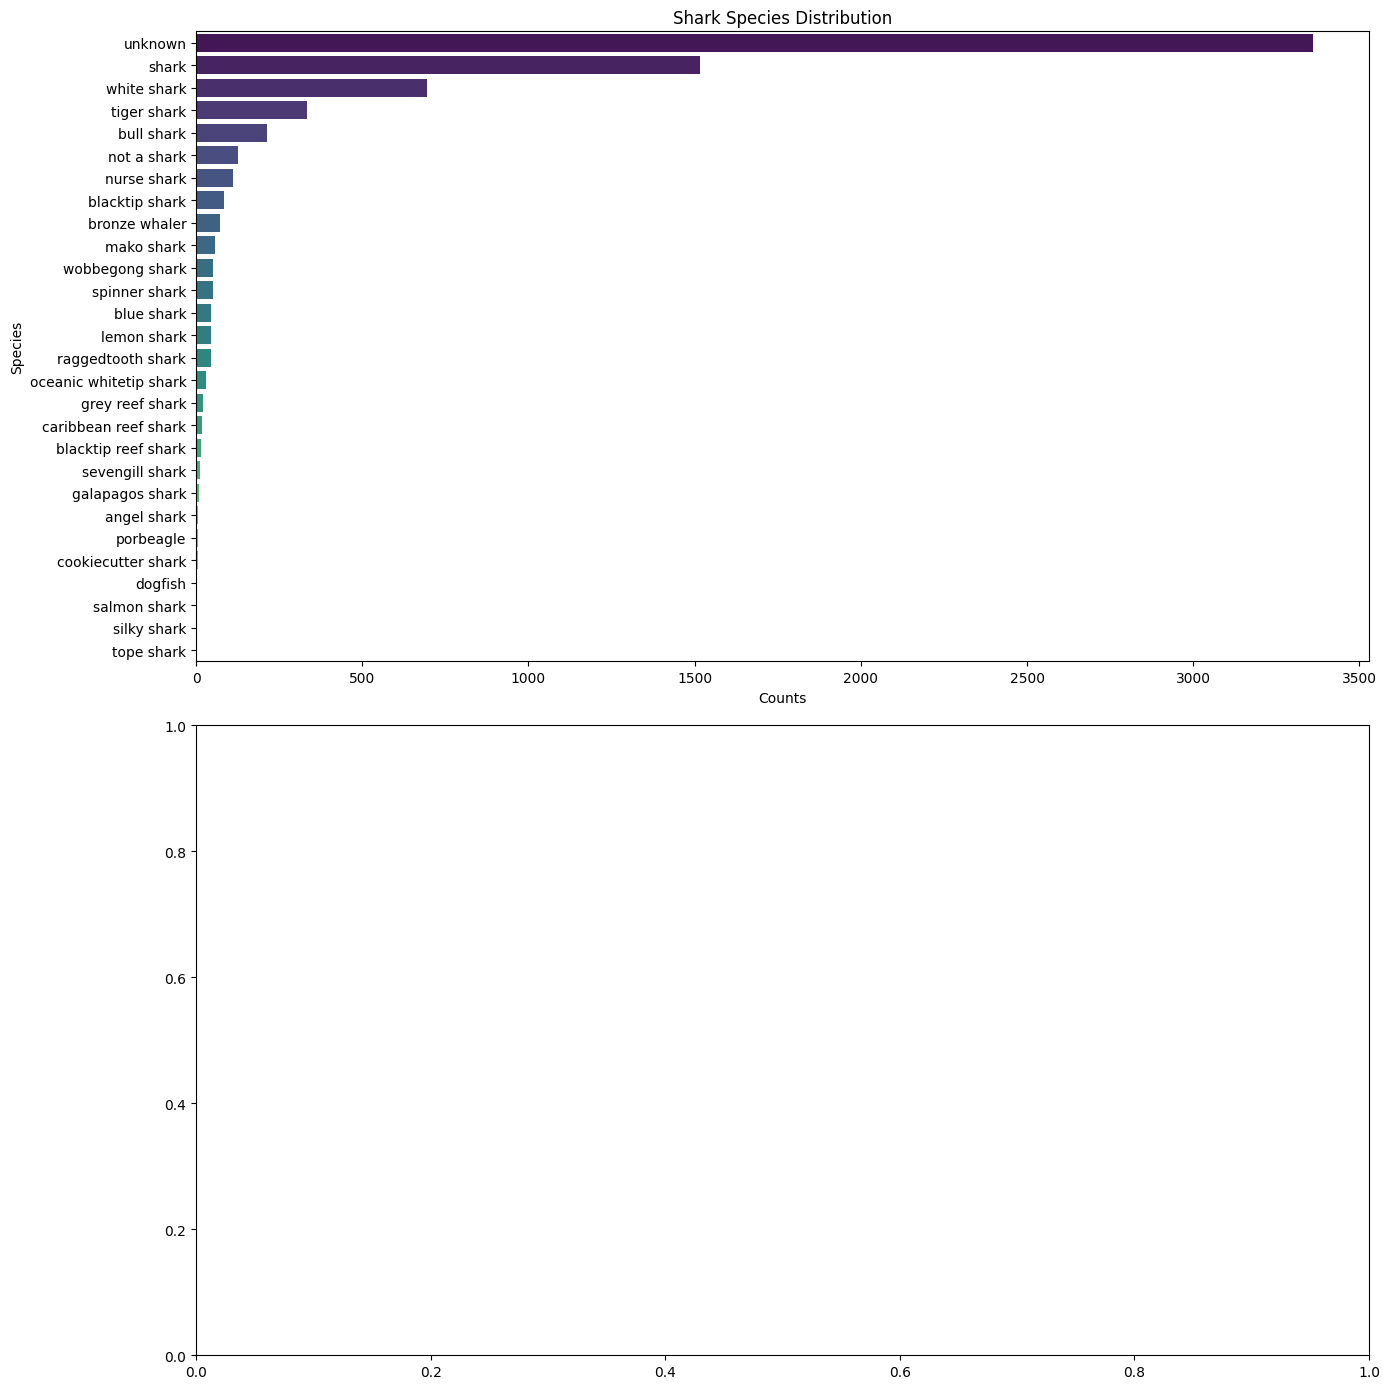

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming shark_df is your DataFrame and it has been loaded already

# Calculate species counts
species_counts = shark_df['species_'].value_counts()


# Calculate country counts
country_counts = shark_df['country'].value_counts()

# Convert the Series to DataFrames
df_species_counts = species_counts.reset_index()
df_species_counts.columns = ['species', 'count']

df_country_counts = country_counts.reset_index()
df_country_counts.columns = ['country', 'count']

# Step 1: Set up the figure and axis
fig, axes = plt.subplots(2, 1, figsize=(14, 14))  # Two subplots one on top of the other

# Step 2: Horizontal Bar Chart for Species
sns.barplot(x='count', y='species', data=df_species_counts, palette='viridis', ax=axes[0])
axes[0].set_title('Shark Species Distribution')
axes[0].set_xlabel('Counts')
axes[0].set_ylabel('Species')

# Step 3: Horizontal Bar Chart for Countries
#sns.barplot(x='count', y='country', data=df_country_counts, palette='viridis', ax=axes[1])
#axes[1].set_title('Shark Incidents by Country')
#axes[1].set_xlabel('Counts')
#axes[1].set_ylabel('Country')

# Step 4: Adjust the layout and display
plt.tight_layout()
plt.show()

In [ ]:
top_10_countries = df_country_counts.sort_values(by='count', ascending=False).head(10)

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 10))  # Adjusting the figure size for two subplots

# Horizontal Bar Chart for Countries
sns.barplot(x='count', y='country', data=top_10_countries, palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 Shark Incidents by Country')
axes[1].set_xlabel('Counts')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

In [ ]:
#Select value from not clean DF
#fatal_clean =morning_attacks[morning_attacks['fatal'] == 'y']

In [ ]:
#fatal_species= fatal_clean.groupby('species_')['fatal'].count()
#fatal_species

In [ ]:
shark_df1 = shark_df.filter(['date','type','country', "activity", "sex ", "fatal"], axis=1)
shark_df1

In [ ]:
shark_df1.groupby("activity").count().sort_values(["fatal"], ascending=False).head().plot(kind = "barh")

In [ ]:
shark_df1.groupby("country").count().sort_values(["fatal"], ascending=False).head(10).plot(kind = "barh")

In [ ]:
import matplotlib.pyplot as plt
grouped_data = shark_df1.groupby("country").count().sort_values(by=["fatal"], ascending=False).head(10)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(grouped_data['fatal'], labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries by Fatal Shark Incidents')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [ ]:
# Group the data by country and count the fatal incidents, then sort and get the top 10
grouped_data = shark_df1.groupby("country").count().sort_values(by=["fatal"], ascending=False).head(10)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(grouped_data['fatal'], autopct='%1.1f%%', startangle=140)

# Adding a legend
plt.legend(wedges, grouped_data.index, title="Country", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Title and other adjustments
plt.title('Top 10 Countries by Fatal Shark Incidents')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

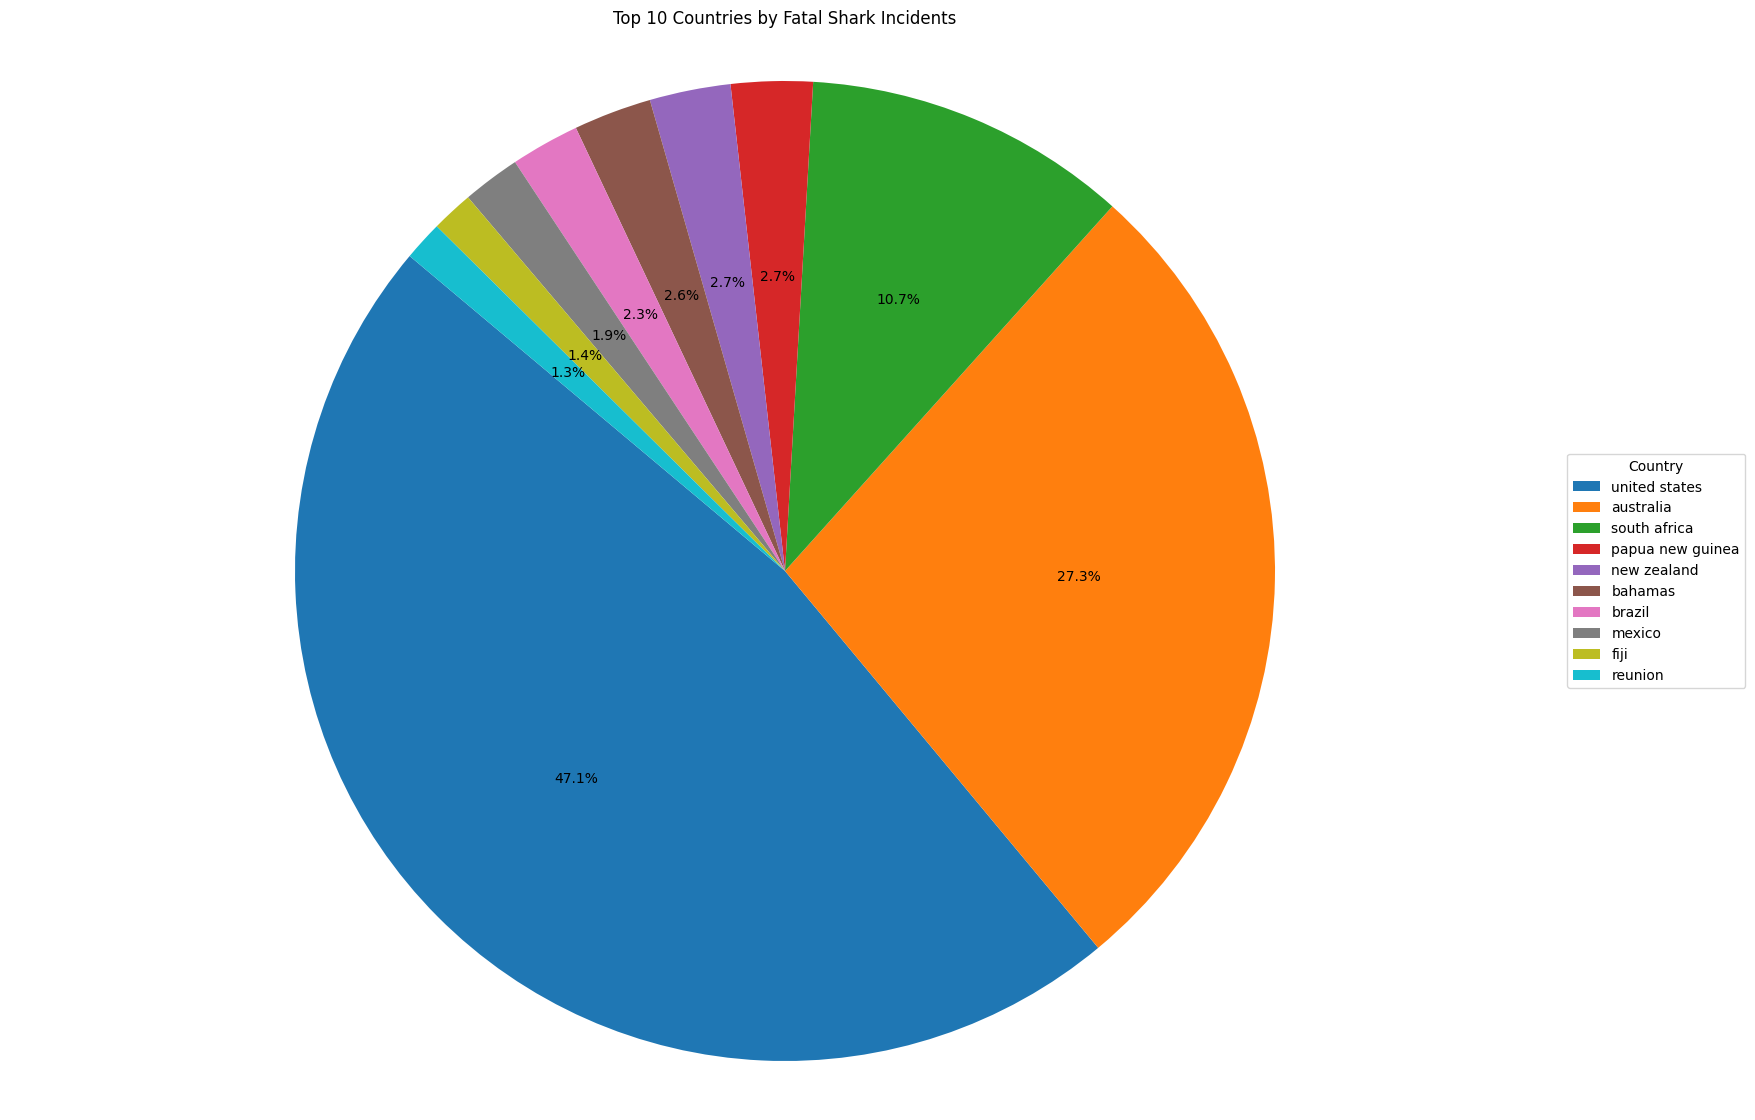

In [205]:
import numpy as np
# Group the data by country and count the fatal incidents, then sort and get the top 10
grouped_data = shark_df1.groupby("country").count().sort_values(by=["fatal"], ascending=False).head(10)

# Plotting the pie chart
plt.figure(figsize=(20, 14))
wedges, texts, autotexts = plt.pie(grouped_data['fatal'], autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Function to adjust the positions of the percentages
def adjust_text_position(texts, wedges):
    for text, wedge in zip(texts, wedges):
        angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
        x = wedge.r * 0.6 * np.cos(np.radians(angle))
        y = wedge.r * 0.6 * np.sin(np.radians(angle))
        text.set_position((x, y))

# Adjust the positions of the percentages
adjust_text_position(autotexts, wedges)

# Adding a legend
plt.legend(wedges, grouped_data.index, title="Country", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Title and other adjustments
plt.title('Top 10 Countries by Fatal Shark Incidents')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

In [206]:
shark_df['sex'].unique()

array(['f', 'm', nan, 'lli', 'm x 2', 'n', '.'], dtype=object)

In [207]:
sex_mapping = {
    'f': 'female',
    'm': 'male'
}

# Map the values and set unmapped values to NaN
shark_df['sex'] = shark_df['sex'].map(sex_mapping).fillna(np.nan)

shark_df

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal,time,species_,source,case_number,case_number_1
0,2024-03-15,2024-01-01,unprovoked,australia,queensland,bargara beach,swimming,brooklyn sauer,female,13.0,"minor injuries to back, abdomen and legs",NaN,16:00:00,tiger shark,"yahoo news, 3/15/2024",NaN,NaN
1,2024-03-04,2024-01-01,unprovoked,united states,hawaii,"old man's, waikiki",surfing,matthew white,male,NaN,"no injury, shark bit surfboard",n,NaT,tiger shark,"surfer, 3/6/2024f",NaN,NaN
2,2024-03-02,2024-01-01,unprovoked,united states,hawaii,"rainbows, oahu",swimming,NaN,female,11.0,lacerations to left foot,n,13:30:00,shark,"hawaii news now, 3/4/2024",NaN,NaN
3,2024-02-25,2024-01-01,unprovoked,australia,western australia,"sandlnd island, jurian bay",NaN,female,female,46.0,leg bitten,n,11:30:00,tiger shark,"wa today, 2/26/2024",NaN,NaN
4,2024-02-14,2024-01-01,unprovoked,india,maharashtra,"vaitarna river, palghar district",fishing,vicky suresh govari,male,32.0,calf of lower left leg injured,n,NaT,bull shark,"times of india, 2/14/2024",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,NaT,NaT,unprovoked,australia,western australia,roebuck bay,diving,male,male,NaN,fatal,y,NaN,unknown,"h. taunton; n. bartlett, p. 234",nd.0005,nd.0005
6940,NaT,NaT,unprovoked,australia,western australia,NaN,pearl diving,ahmun,male,NaN,fatal,y,NaN,unknown,"h. taunton; n. bartlett, pp. 233-234",nd.0004,nd.0004
6941,NaT,NaT,unprovoked,united states,north carolina,ocracoke inlet,swimming,coast guard personnel,male,NaN,fatal,y,NaN,unknown,"f. schwartz, p.23; c. creswell, gsaf",nd.0003,nd.0003
6942,NaT,NaT,unprovoked,panama,NaN,"panama bay 8ºn, 79ºw",NaN,jules patterson,male,NaN,fatal,y,NaN,unknown,"the sun, 10/20/1938",nd.0002,nd.0002


In [208]:
shark_df['sex'].unique()

array(['female', 'male', nan], dtype=object)

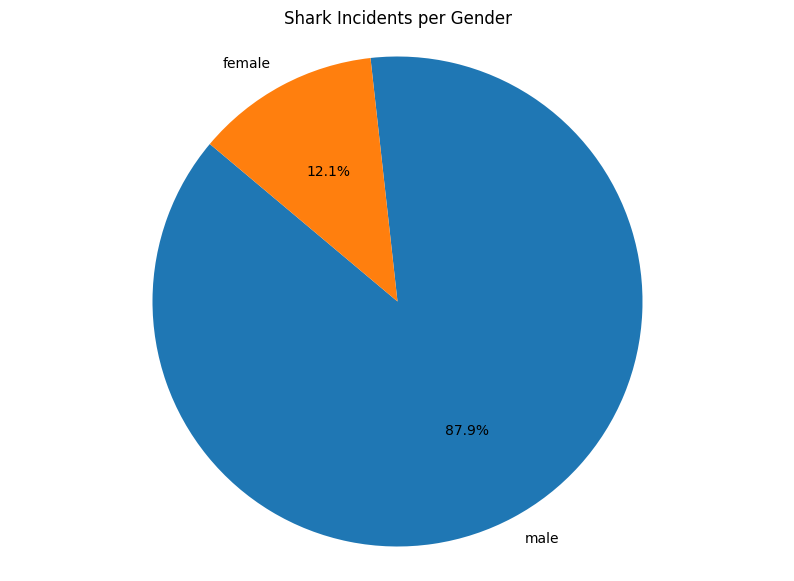

In [209]:
# Group the data by 'sex' and count the fatal incidents
grouped_data = shark_df.groupby("sex")['fatal'].count().sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Shark Incidents per Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

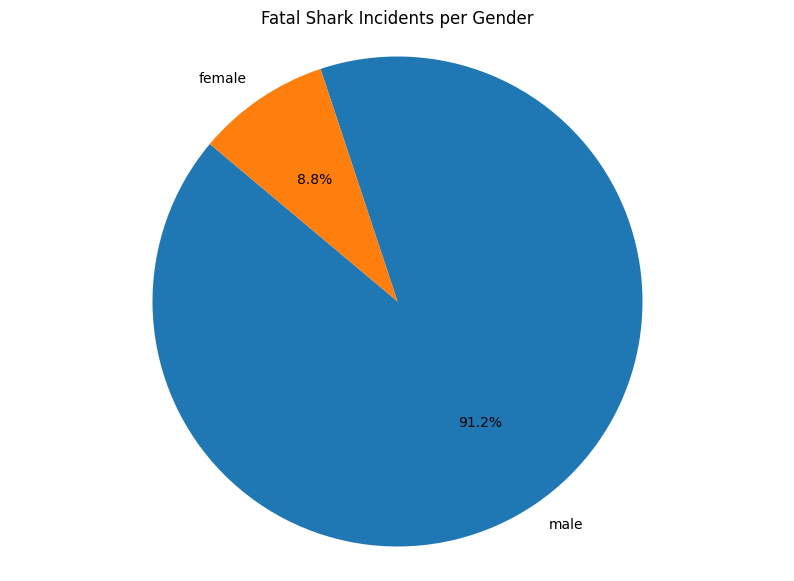

In [210]:

# Filter the DataFrame to include only fatal incidents
fatal_incidents = shark_df[shark_df['fatal'] == 'y']

# Group the data by 'sex' and count the fatal incidents
grouped_data = fatal_incidents.groupby('sex')['fatal'].count().sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Fatal Shark Incidents per Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [211]:
shark_df['sex'].unique()

array(['female', 'male', nan], dtype=object)